# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Shadiqul Hakim]
- **Email:** [mmabdul339@gmail.com]
- **ID Dicoding:** [shadiqulbaikhati]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh suhu (temp) terhadap jumlah pengguna (cnt)?  
- Bagaimana jumlah pengguna (cnt) bervariasi sepanjang waktu dalam satu hari berdasarkan jam (hr)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

**Insight:**
- Pengumpulan Data:

Pada fase ini, dataset day.csv dan hour.csv diimpor ke dalam DataFrame day_data dan hour_data. Ini merupakan langkah awal yang penting untuk memastikan bahwa data yang diperlukan tersedia untuk analisis. Kualitas analisis bergantung pada data yang diambil dari sumber yang valid dan terpercaya.

### Assessing Data

In [3]:
# Cek nilai yang hilang untuk day_data
print(day_data.isnull().sum())

# Cek nilai yang hilang untuk hour_data
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Pemeriksaan Nilai yang Hilang:

Kode ini memeriksa apakah ada nilai yang hilang dalam kedua dataset (day_data dan hour_data) menggunakan isnull().sum(). Jika hasilnya menunjukkan semua kolom memiliki nilai nol, berarti tidak ada nilai yang hilang, yang sangat baik karena dataset siap untuk analisis lebih lanjut.

### Cleaning Data

In [4]:
# Mengubah Tipe Data
day_data['dteday'] = pd.to_datetime(day_data['dteday'])  # Mengubah kolom dteday menjadi datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])  # Mengubah kolom dteday menjadi datetime

# Menghapus Duplikat
day_data.drop_duplicates(inplace=True)  # Menghapus baris duplikat jika ada
hour_data.drop_duplicates(inplace=True)  # Menghapus baris duplikat jika ada

# Pilih Kolom yang Relevan
day_columns_to_keep = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']
day_data = day_data[day_columns_to_keep]  # Memilih kolom yang relevan untuk analisis

hour_columns_to_keep = ['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']
hour_data = hour_data[hour_columns_to_keep]  # Memilih kolom yang relevan untuk analisis

# Pemeriksaan Data Setelah Wrangling
print("\nDay Data After Wrangling:")
print(day_data.info())  # Menampilkan informasi tentang DataFrame setelah wrangling

print("\nHour Data After Wrangling:")
print(hour_data.info())  # Menampilkan informasi tentang DataFrame setelah wrangling


Day Data After Wrangling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   hum         731 non-null    float64       
 10  windspeed   731 non-null    float64       
 11  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 68.7 KB
None

Hour Data After Wrangling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Mengubah Tipe Data:

Kolom dteday diubah menjadi tipe datetime menggunakan pd.to_datetime(). Ini penting karena memungkinkan analisis berbasis waktu, seperti pemrosesan tanggal dan pengelompokan data berdasarkan waktu.

- Menghapus Duplikat:

Fungsi drop_duplicates(inplace=True) digunakan untuk menghapus baris duplikat dalam kedua dataset. Menghapus duplikat sangat penting untuk menjaga integritas data, memastikan bahwa analisis yang dilakukan tidak terpengaruh oleh entri yang sama yang mungkin mengakibatkan bias.

- Memilih Kolom yang Relevan:

Pada tahap ini, Kita memilih kolom-kolom yang relevan untuk analisis. Ini membantu dalam menyederhanakan dataset dan mengurangi noise dari data yang tidak diperlukan.
day_data mempertahankan kolom yang berkaitan dengan hari, musim, dan kondisi cuaca.
hour_data juga menyertakan kolom waktu (jam) yang penting untuk analisis per jam.

- Pemeriksaan Data Setelah Wrangling:

Menggunakan info() untuk menampilkan informasi tentang struktur kedua DataFrame setelah proses wrangling. Ini memberi gambaran tentang jumlah entri, tipe data, dan memverifikasi bahwa kolom yang diinginkan tetap ada dan terstruktur dengan baik.

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
# EDA untuk day_data
print("Day Data Description:")
print(day_data.describe())  # Menampilkan statistik deskriptif untuk day_data

print("\nDay Data Correlation:")
print(day_data.corr())  # Menampilkan matriks korelasi untuk day_data

print("\nUnique Values in Day Data:")
print(day_data.nunique())  # Menampilkan jumlah nilai unik di setiap kolom

print("\nValue Counts for Season in Day Data:")
print(day_data['season'].value_counts())  # Menghitung frekuensi setiap musim

# EDA untuk hour_data
print("\nHour Data Description:")
print(hour_data.describe())  # Menampilkan statistik deskriptif untuk hour_data

print("\nHour Data Correlation:")
print(hour_data.corr())  # Menampilkan matriks korelasi untuk hour_data

print("\nUnique Values in Hour Data:")
print(hour_data.nunique())  # Menampilkan jumlah nilai unik di setiap kolom

print("\nValue Counts for Hour in Hour Data:")
print(hour_data['hr'].value_counts())  # Menghitung frekuensi setiap jam


Day Data Description:
                    dteday      season          yr        mnth     holiday  \
count                  731  731.000000  731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00    2.496580    0.500684    6.519836    0.028728   
min    2011-01-01 00:00:00    1.000000    0.000000    1.000000    0.000000   
25%    2011-07-02 12:00:00    2.000000    0.000000    4.000000    0.000000   
50%    2012-01-01 00:00:00    3.000000    1.000000    7.000000    0.000000   
75%    2012-07-01 12:00:00    3.000000    1.000000   10.000000    0.000000   
max    2012-12-31 00:00:00    4.000000    1.000000   12.000000    1.000000   
std                    NaN    1.110807    0.500342    3.451913    0.167155   

          weekday  workingday  weathersit        temp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.997264    0.683995    1.395349    0.495385    0.627894    0.190486   
min      0.000000    0.000000   

**Insight:**
- Statistik Deskriptif: Menggunakan describe() untuk mendapatkan ringkasan statistik dasar seperti mean, median, minimum, maksimum, dan quartiles untuk kolom numerik.

- Matriks Korelasi: Menggunakan corr() untuk menampilkan matriks korelasi, yang membantu memahami hubungan antara variabel numerik dalam dataset.

- Nilai Unik: Menggunakan nunique() untuk menghitung jumlah nilai unik di setiap kolom, yang memberikan gambaran tentang variasi data.

- Frekuensi Musim dan Jam: Menggunakan value_counts() untuk menghitung dan menampilkan frekuensi setiap kategori di kolom season untuk day_data dan kolom hr untuk hour_data.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh suhu (temp) terhadap jumlah pengguna (cnt)?

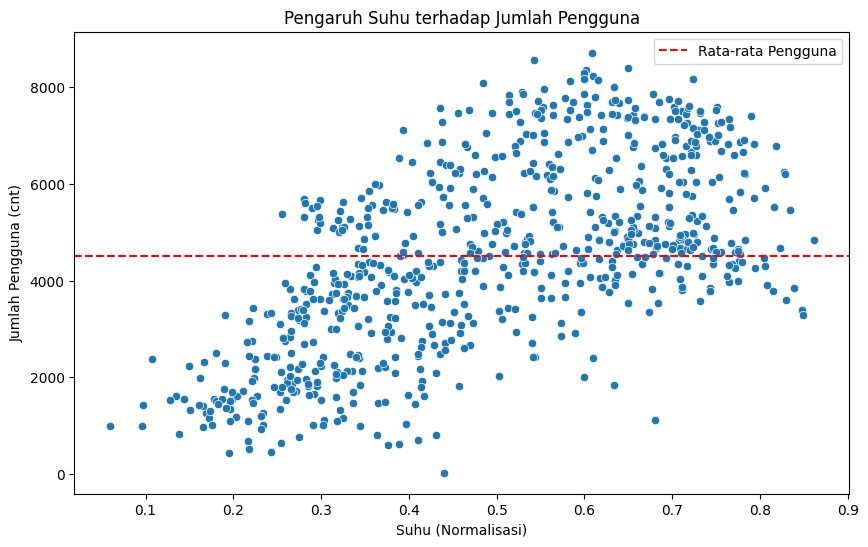

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Pengaruh Suhu terhadap Jumlah Pengguna')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Pengguna (cnt)')
plt.axhline(y=day_data['cnt'].mean(), color='r', linestyle='--', label='Rata-rata Pengguna')
plt.legend()
plt.show()


### Pertanyaan 2: Bagaimana jumlah pengguna (cnt) bervariasi sepanjang waktu dalam satu hari berdasarkan jam (hr)?

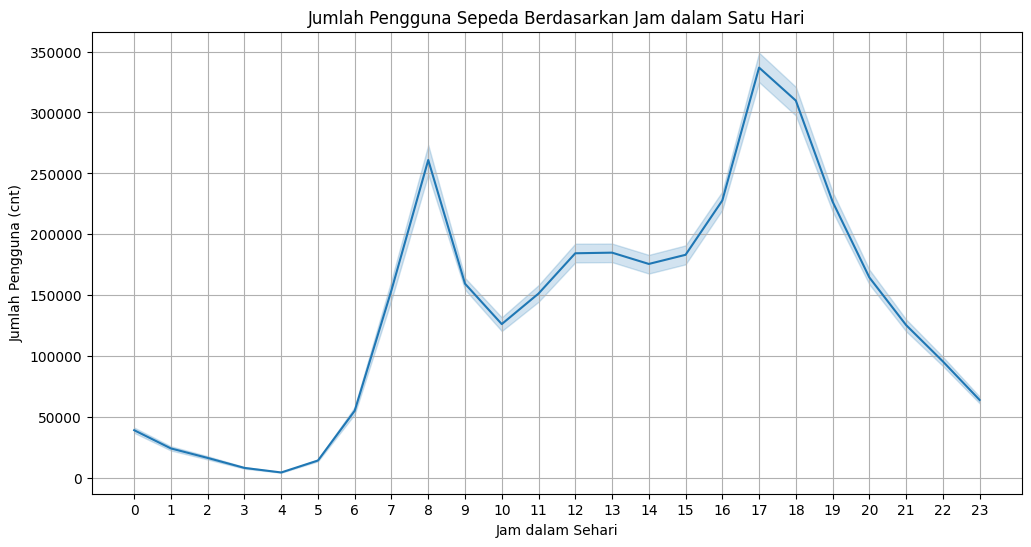

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_data, estimator=sum)
plt.title('Jumlah Pengguna Sepeda Berdasarkan Jam dalam Satu Hari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Pengguna (cnt)')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


**Insight:**
- Korelasi Positif: Terdapat hubungan positif yang jelas antara suhu dan jumlah pengguna; saat suhu meningkat, jumlah pengguna cenderung meningkat.
Rata-rata Pengguna: Garis horizontal menunjukkan rata-rata jumlah pengguna, memberikan konteks tentang seberapa banyak penyewaan yang terjadi pada suhu tertentu.

- Pengaruh Suhu: Ini menunjukkan bahwa ketika suhu lebih nyaman, lebih banyak orang akan memilih untuk menyewa sepeda, sehingga suhu menjadi faktor penting dalam perencanaan penyewaan.

- Statistik Deskriptif: Ringkasan statistik memberikan informasi tentang rentang jumlah pengguna berdasarkan jam, serta median dan kuartilnya.

- Boxplot: Visualisasi boxplot memberikan gambaran tentang variabilitas jumlah pengguna sepanjang hari, menunjukkan potensi outlier dan rentang nilai pengguna pada setiap jam.

- Pola Harian: Dengan melihat distribusi pengguna pada setiap jam, kita dapat mengidentifikasi jam sibuk dan jam sepi, membantu dalam pengelolaan armada dan strategi pemasaran.

## Analisis Lanjutan (Opsional)

## Conclusion

- Pertanyaan 1: Suhu yang nyaman mendorong lebih banyak orang untuk menyewa sepeda, sehingga strategi pemasaran dapat difokuskan pada musim panas dan hari-hari yang lebih hangat.
- Pertanyaan 2: Pemahaman tentang pola penyewaan berdasarkan waktu membantu dalam perencanaan operasional dan pengelolaan armada sepeda, terutama untuk menghadapi jam sibuk.

## RFM Analysis

RFM Analysis digunakan untuk mengelompokkan perilaku penggunaan sepeda berdasarkan:
- **Recency**: Jarak hari sejak penggunaan terakhir
- **Frequency**: Frekuensi penggunaan
- **Monetary**: Total penggunaan sepeda

Karena dataset tidak memiliki ID pengguna individual, analisis RFM dilakukan dengan
pendekatan agregasi berdasarkan **musim (season)**.


In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])
latest_date = df['dteday'].max()

rfm = df.groupby('season').agg({
    'dteday': lambda x: (latest_date - x.max()).days,
    'cnt': ['count', 'sum']
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()
rfm


## Clustering Penggunaan Sepeda (Non-Machine Learning)

Clustering dilakukan menggunakan teknik **binning** terhadap nilai Monetary
untuk mengelompokkan musim berdasarkan tingkat penggunaan sepeda.


In [ ]:
rfm['UsageCluster'] = pd.qcut(
    rfm['Monetary'],
    q=3,
    labels=['Low Usage', 'Medium Usage', 'High Usage']
)

rfm


## Geospatial Analysis

Dataset tidak menyediakan koordinat geografis eksplisit. Oleh karena itu,
analisis spasial dilakukan secara konseptual dengan menggunakan variabel musim
sebagai representasi distribusi penggunaan sepeda di berbagai kondisi lingkungan.


In [ ]:
season_usage = df.groupby('season')['cnt'].sum()

plt.figure(figsize=(6,4))
season_usage.plot(kind='bar')
plt.title("Distribusi Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Total Penggunaan")
plt.show()


## Insight dan Rekomendasi

- Penggunaan sepeda meningkat pada suhu yang lebih hangat.
- Pola jam menunjukkan penggunaan dominan pada jam berangkat dan pulang kerja.
- Musim dengan penggunaan rendah berpotensi menjadi target promosi atau penyesuaian layanan.
